<a href="https://colab.research.google.com/github/OswaldGutierrez/Modelos-IA-2025-1/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">ENTREGA 1. PROYECTO IA 2025-1</font>

In [35]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import local.lib.mlutils
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
%matplotlib inline

<font size="5">**1. DIMENSIONES DEL DATAFRAME**</font>


In [37]:
d = pd.read_csv("train.csv")
print (d.shape)

(692500, 21)


<font size="5">**2. PRIMERAS FILAS DEL DATASET**</font>


In [38]:
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


<font size="5">**3. CANTIDAD DE HORAS QUE TRABAJAN LOS ESTUDIANTES POR SEMANA**</font>


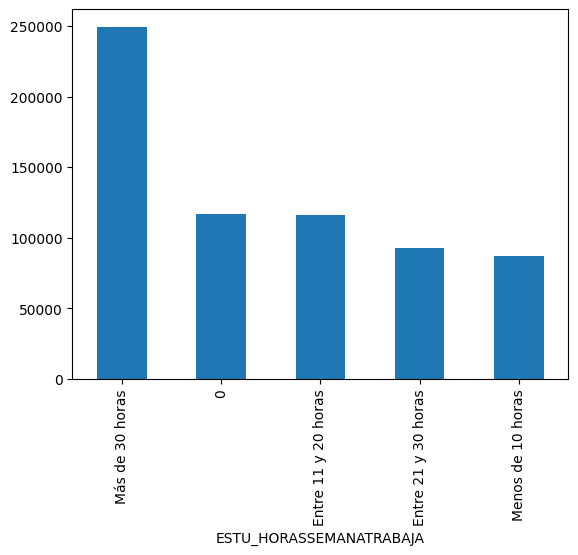

In [39]:
d.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')
plt.show()

<font size="5">**4. CANTIDAD DE ESTUDIANTES POR DEPARTAMENTO EN COLOMBIA**</font>


In [40]:
estudiantesdepar = d['ESTU_PRGM_DEPARTAMENTO'].value_counts()
display(estudiantesdepar)

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


<font size="5">**5. RENDIMIENTO DE LOS ESTUDIANTES DEL DEPARTAMENTO DEL CESAR**</font>


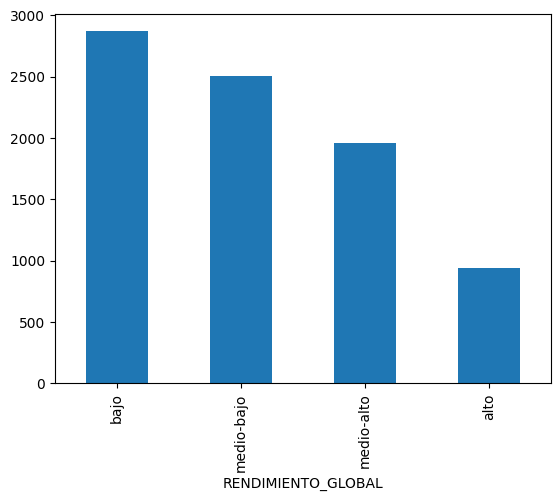

In [41]:
cesar = d[d["ESTU_PRGM_DEPARTAMENTO"] == "CESAR"]
cesar.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')
plt.show()

<font size="5">**6. CANTIDAD DE ESTUDIANTES POR PREGRADO**</font>


In [42]:
estudiantesprog = d['ESTU_PRGM_ACADEMICO'].value_counts()
display(estudiantesprog)

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


<font size="5">**7. CANTIDAD DE FAMILIAS CON ACCESO A INTERNET**</font>


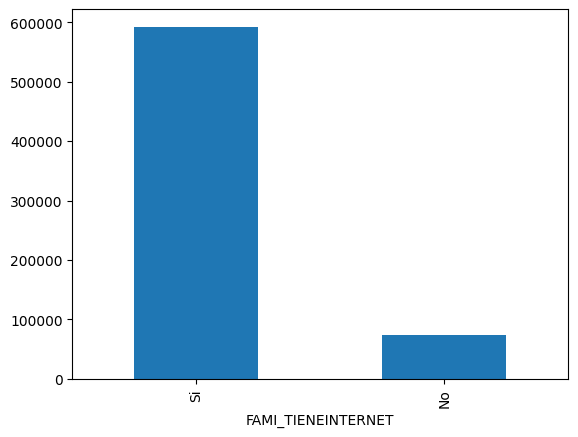

In [43]:
d.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')
plt.show()